In [247]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
print(os.listdir("../Python-ILP"))

['hello.py', 'result.svg', 'FIFA 19.ipynb', 'Day 10 - 11 GUI, File and exception.ipynb', 'output.json', 'gamersky_08origin_15_2019321457125.jpg', 'gamersky_10origin_19_2019391551823.jpg', 'Day 12-13 Strings and regular expressions, Process and thread.ipynb', 'data.json', 'c.txt', 'news.json', 'b.txt', 'a.txt', 'Day 15 Pics.ipynb', '1.txt', '.ipynb_checkpoints', 'Day 16 - 20.ipynb', '.git', 'Day 01-06.ipynb', 'Day 07-.ipynb', 'Day 08 - 09 OO.ipynb', 'Matplotlib and Data visualization.ipynb', 'Day 14 Introduction to Network Programming.ipynb', 'fifa19.csv']


In [248]:
data = pd.read_csv('../Python-ILP/fifa19.csv')
print(data.shape)

(18207, 89)


In [249]:
using_columns = [
    'Name', 
    'Age', 
    'Photo', 
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club',
    'Position',
    'Value', 
    'Wage',     
    'Release Clause'
]
dataset = pd.DataFrame(data, columns = using_columns)

In [250]:
dataset.head()

,Name,Age,Photo,Nationality,Overall,Potential,Club,Position,Value,Wage,Release Clause
0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,94,94,FC Barcelona,RF,€110.5M,€565K,€226.5M
1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,94,94,Juventus,ST,€77M,€405K,€127.1M
2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,92,93,Paris Saint-Germain,LW,€118.5M,€290K,€228.1M
3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,91,93,Manchester United,GK,€72M,€260K,€138.6M
4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,91,92,Manchester City,RCM,€102M,€355K,€196.4M


In [251]:
#Check null
dataset.isnull().sum()

Name                 0
Age                  0
Photo                0
Nationality          0
Overall              0
Potential            0
Club               241
Position            60
Value                0
Wage                 0
Release Clause    1564
dtype: int64

In [252]:
dataset['Club'].fillna('Null', inplace = True)
dataset['Release Clause'].fillna('€0K', inplace = True)

In [253]:
dataset.describe()

,Age,Overall,Potential
count,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299
std,4.669943,6.908930,6.136496
min,16.000000,46.000000,48.000000
25%,21.000000,62.000000,67.000000
50%,25.000000,66.000000,71.000000
75%,28.000000,71.000000,75.000000
max,45.000000,94.000000,95.000000


In [254]:
#Number of countries and top 5 countries with highest number of players
print('Total country numbers are : {0}'.format(dataset['Nationality'].nunique()))
print(dataset['Nationality'].value_counts().head(5))

Total country numbers are : 164
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64


In [255]:
###### Top 5 players who have maximum potential and overall
print('Maximum Potential : '+str(dataset.loc[dataset['Potential'].idxmax()][0]) + ' with '+ str(dataset.loc[dataset['Potential'].idxmax()][5]))
print('Maximum Overall Perforamnce : '+str(dataset.loc[dataset['Overall'].idxmax()][0]) + ' with ' + str(dataset.loc[dataset['Overall'].idxmax()][4]))

Maximum Potential : K. Mbappé with 95
Maximum Overall Perforamnce : L. Messi with 94


In [256]:
#Convert M, K values to numbers
def to_num(value):
    if value[-1] == 'M':
        return float(value[1:-1])*1000000
    elif value[-1] == 'K':
        return float(value[1:-1])*1000
    else:
        return float(value[1:])
    
dataset['Value'] = dataset['Value'].apply(lambda x: to_num(x))
dataset['Wage'] = dataset['Wage'].apply(lambda x: to_num(x))
dataset['Release Clause'] = dataset['Release Clause'].apply(lambda x: to_num(x))

In [257]:
dataset.head()

,Name,Age,Photo,Nationality,Overall,Potential,Club,Position,Value,Wage,Release Clause
0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,94,94,FC Barcelona,RF,110500000.0,565000.0,226500000.0
1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,94,94,Juventus,ST,77000000.0,405000.0,127100000.0
2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,92,93,Paris Saint-Germain,LW,118500000.0,290000.0,228100000.0
3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,91,93,Manchester United,GK,72000000.0,260000.0,138600000.0
4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,91,92,Manchester City,RCM,102000000.0,355000.0,196400000.0


In [258]:
players_value = dataset.sort_values("Value", ascending=False).head(20).reset_index()[["Name", "Overall", "Potential", "Value", "Age"]]

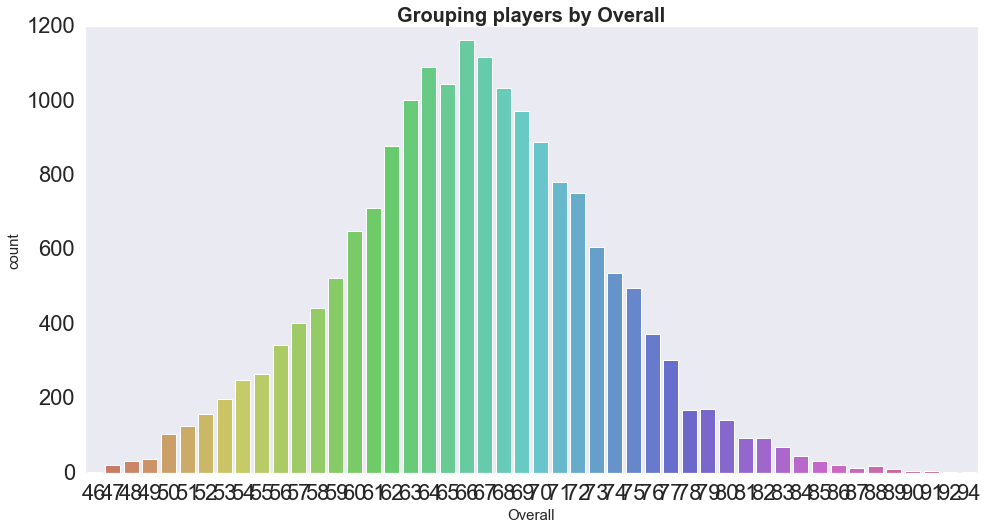

In [259]:
plt.figure(figsize=(16,8))
sns.set_style("dark")
plt.title('Grouping players by Overall', fontsize=20, fontweight='bold', y=1,)
plt.xlabel('Overall of players', fontsize=15)
plt.ylabel('Number of players', fontsize=15)
sns.countplot(x="Overall", data=dataset, palette="hls");
plt.show()

In [260]:
# Selecting players with age smaller then 40 
dataset40 = dataset.loc[dataset['Age'] <= 40]
# Selecting unique Age from DataFrame
age = dataset40.sort_values("Age")['Age'].unique()
# Selecting mean Overall from DataFrame
overall = dataset40.groupby("Age")["Overall"].mean().values
# Selecting mean Overall from DataFrame
potential = dataset40.groupby("Age")["Potential"].mean().values

<Figure size 432x288 with 0 Axes>

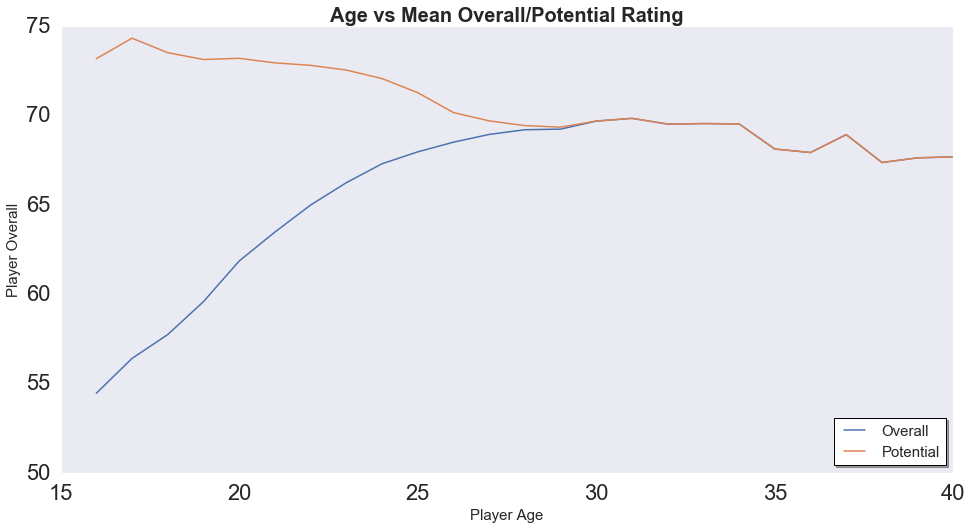

In [261]:
plt.figure()
plt.figure(figsize=(16,8))
plt.title('Age vs Mean Overall/Potential Rating', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Overall', fontsize=15)
sns.set_style("dark")
plt.plot(age, overall, label="Overall")
plt.plot(age, potential, label="Potential")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 432x288 with 0 Axes>

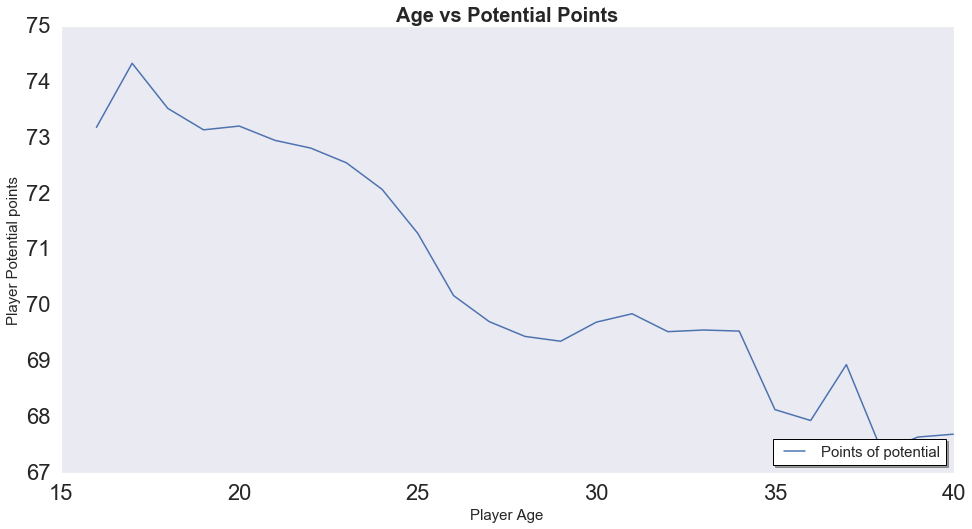

In [262]:
# Selecting mean PotentialPoints from DataFrame
potential_points = dataset40.groupby("Age")["Potential"].mean().values
plt.figure()
plt.figure(figsize=(16,8))
plt.title('Age vs Potential Points', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Potential points', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, potential_points, label="Points of potential")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

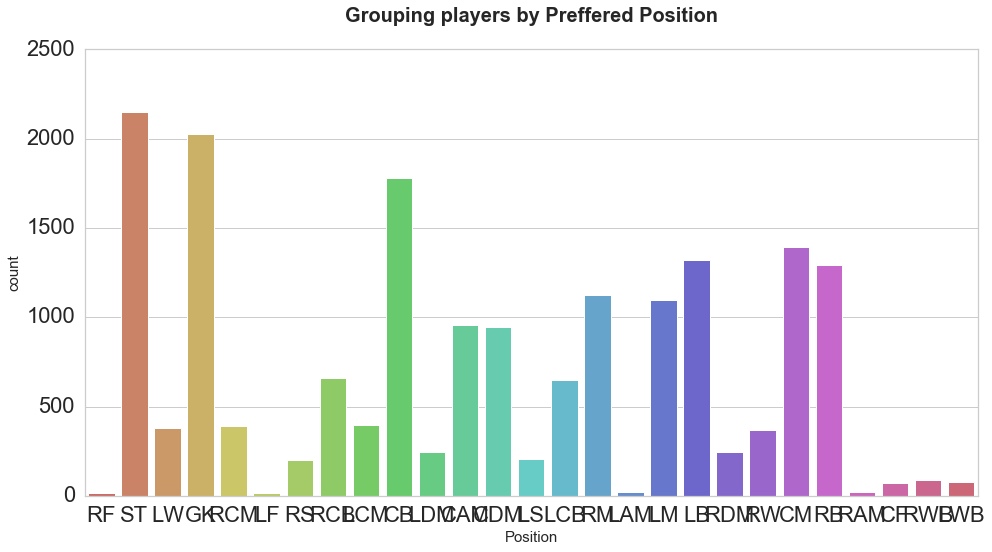

In [263]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Preffered Position', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Position", data=dataset, palette="hls");
plt.show()

In [264]:
sorted_players = dataset.sort_values(["Value"], ascending=False).head(10)
players = sorted_players[["Name" ,"Age" ,"Nationality" ,"Club", "Value"]].values

In [265]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Value</th></tr>{}</table>'.format(table_content))
)

Name,Age,Nationality,Club,Value
Neymar Jr,26,Brazil,Paris Saint-Germain,118500000.0
L. Messi,31,Argentina,FC Barcelona,110500000.0
K. De Bruyne,27,Belgium,Manchester City,102000000.0
E. Hazard,27,Belgium,Chelsea,93000000.0
P. Dybala,24,Argentina,Juventus,89000000.0
H. Kane,24,England,Tottenham Hotspur,83500000.0
K. Mbappé,19,France,Paris Saint-Germain,81000000.0
L. Suárez,31,Uruguay,FC Barcelona,80000000.0
A. Griezmann,27,France,Atlético Madrid,78000000.0
R. Lewandowski,29,Poland,FC Bayern München,77000000.0


In [266]:
value_distribution = dataset.sort_values("Value", ascending=False).reset_index().head(100)[["Name", "Value"]]
value_distribution_values = value_distribution["Value"].apply(lambda x: x/1000)

<Figure size 432x288 with 0 Axes>

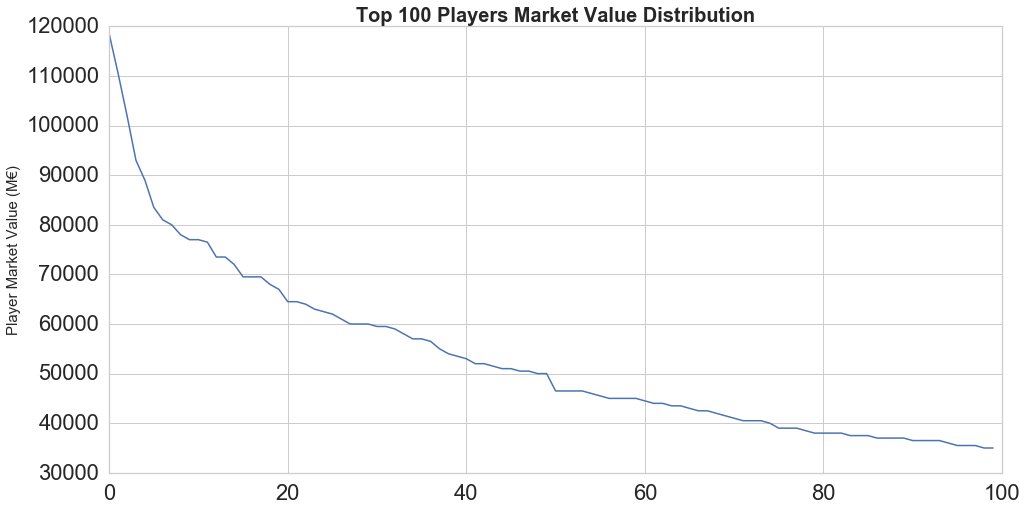

In [267]:
plt.figure()
plt.figure(figsize=(16,8))
plt.title('Top 100 Players Market Value Distribution', fontsize=20, fontweight='bold')
plt.ylabel('Player Market Value (M€)', fontsize=15)
sns.set_style("whitegrid")
plt.plot(value_distribution_values)
plt.show()

In [268]:
value_distribution = dataset.sort_values("Wage", ascending=False).reset_index().head(100)[["Name", "Wage"]]
value_distribution_values = value_distribution["Wage"].apply(lambda x: x/1000)

<Figure size 432x288 with 0 Axes>

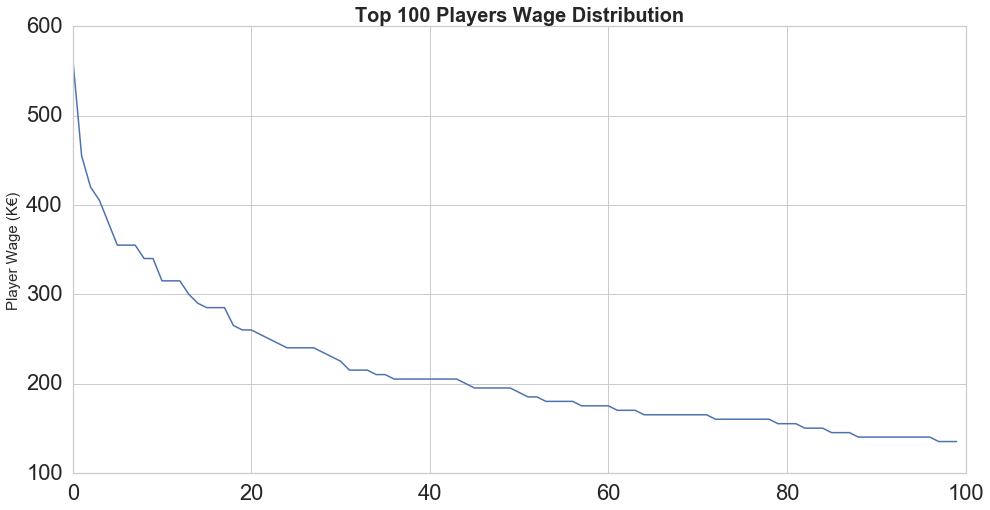

In [269]:
plt.figure()
plt.figure(figsize=(16,8))
plt.title('Top 100 Players Wage Distribution', fontsize=20, fontweight='bold')
plt.ylabel('Player Wage (K€)', fontsize=15)
sns.set_style("whitegrid")
plt.plot(value_distribution_values)
plt.show()

In [270]:
mean_value = float(dataset["Value"].mean())
mean_wage = float(dataset["Wage"].mean())

def largerValue(x, limit):
    if x > limit:
        return 1
    else:
        return 0
    
dataset['LargerMeanValue'] = dataset['Value'].apply(lambda x: largerValue(x, mean_value))
dataset['LargerMeanWage'] = dataset['Wage'].apply(lambda x: largerValue(x, mean_wage))

print('Mean value of player in FIFA 19 is around: €' + str(round(mean_value, -3)))
print('Mean wage of player in FIFA 19 is around: €' + str(round(mean_wage, -3)))

Mean value of player in FIFA 19 is around: €2411000.0
Mean wage of player in FIFA 19 is around: €10000.0


In [271]:
players_wage = dataset.groupby("LargerMeanWage").size().reset_index(name='NumOfPlayers')

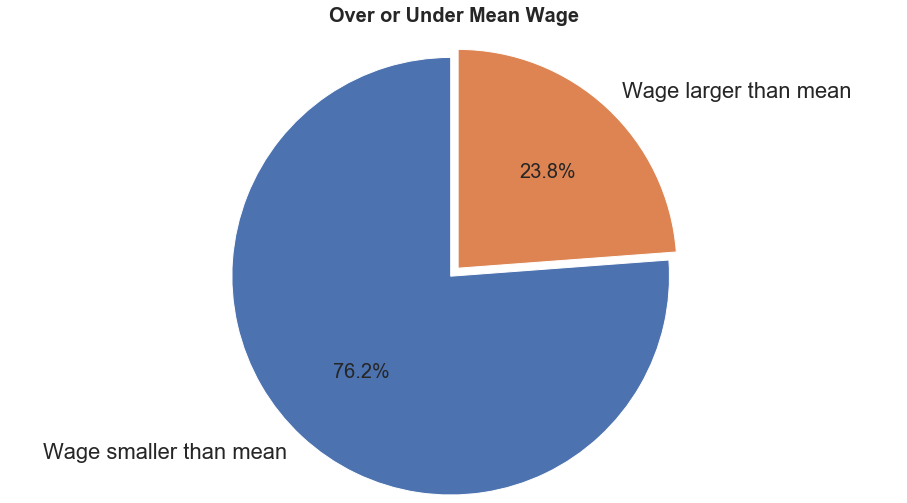

In [272]:
plt.figure(figsize=(16,8))
plt.title('Over or Under Mean Wage', fontsize=20, fontweight='bold', y=1.05,)
labels = 'Wage smaller than mean', 'Wage larger than mean'
explode=(0, 0.05)
plt.rcParams['font.size'] = 20.0
plt.pie(players_wage["NumOfPlayers"], explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

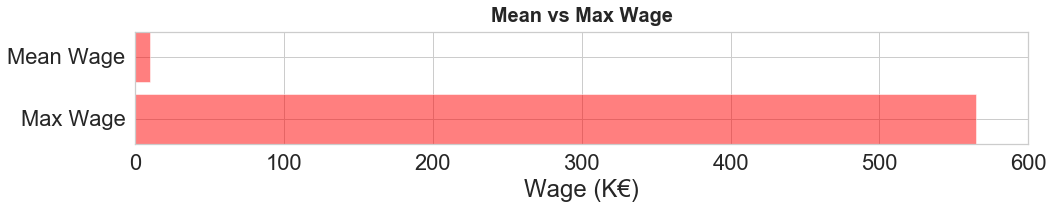

In [273]:
plt.figure(figsize=(16,2))
plt.title('Mean vs Max Wage', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Wage (K€)')

max_wage = dataset['Wage'].max()
objects = ('Max Wage', 'Mean Wage')
y_pos = np.arange(len(objects))
performance = [max_wage/1000, mean_wage/1000]
 
plt.barh(y_pos, performance, align='center', alpha=0.5, color='red')
plt.yticks(y_pos, objects)

plt.show()

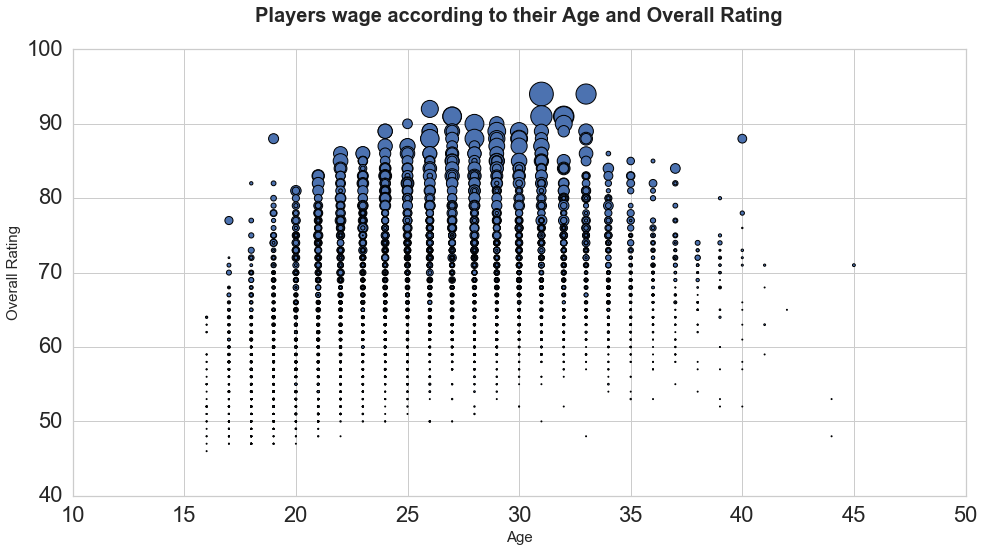

In [274]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players wage according to their Age and Overall Rating', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Overall Rating', fontsize=15)

age = dataset["Age"].values
overall = dataset["Overall"].values
value = dataset["Wage"].values

plt.scatter(age, overall, s = value/1000, edgecolors='black')
plt.show()

<Figure size 432x288 with 0 Axes>

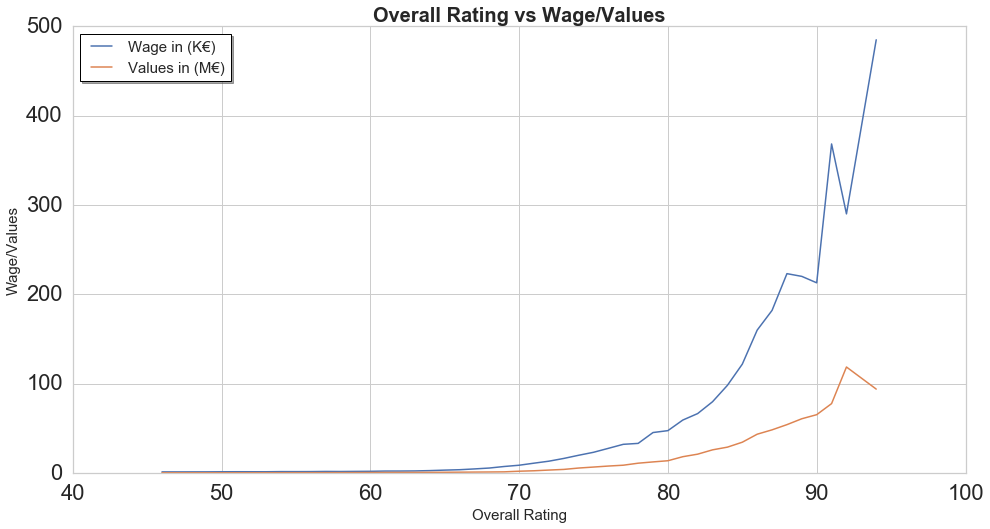

In [300]:
# Selecting unique Overall from DataFrame
overall = dataset.sort_values('Overall')['Overall'].unique()

overall_wage = dataset.groupby(['Overall'])['Wage'].mean()
overall_wage = overall_wage.apply(lambda x: x/1000).values

overall_value = dataset.groupby(['Overall'])['Value'].mean()
overall_value = overall_value.apply(lambda x: x/1000000).values

plt.figure()
plt.figure(figsize=(16,8))
plt.title('Overall Rating vs Wage/Values', fontsize=20, fontweight='bold')
plt.xlabel('Overall Rating', fontsize=15)
plt.ylabel('Wage/Values', fontsize=15)
sns.set_style("darkgrid")
plt.plot(overall, overall_wage, label="Wage in (K€)")
plt.plot(overall, overall_value, label="Values in (M€)")
plt.legend(loc=0, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [276]:
player_position_value = dataset.groupby("Position").mean().reset_index()[["Position", "Wage"]]
player_position_value = player_position_value.sort_values(["Wage"], ascending=False)
player_position_value["Wage"] = player_position_value["Wage"].apply(lambda x: x/1000).values.tolist()

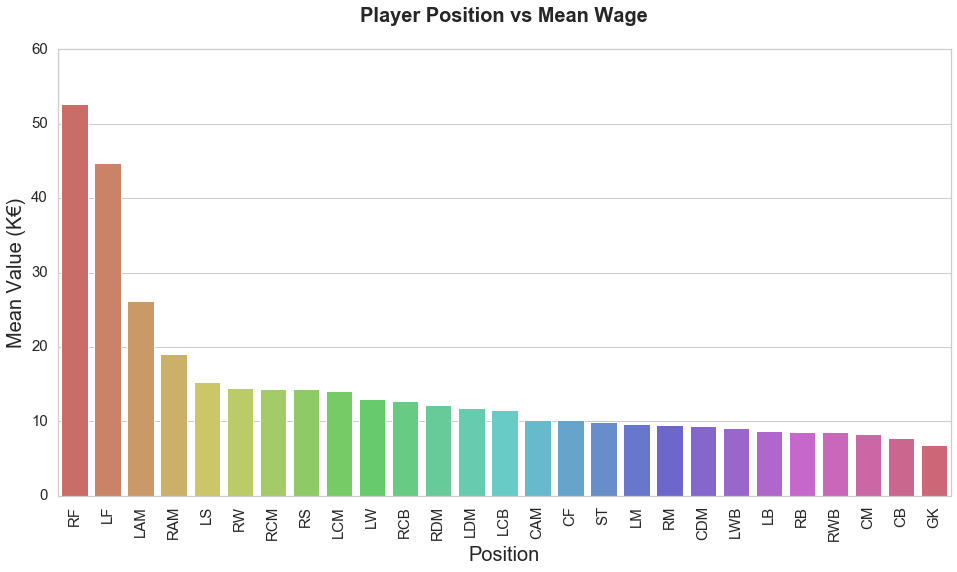

In [277]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Player Position vs Mean Wage', fontsize=20, fontweight='bold', y=1.05,)
sns.set(font_scale = 2)
b = sns.barplot(x="Position", y="Wage", data=player_position_value, palette="hls")
plt.xticks(rotation=90)
b.tick_params(labelsize=15)
plt.xlabel("Position", fontsize=20)
plt.ylabel('Mean Value (K€)', fontsize=20)
plt.show()

In [287]:
top1000 = dataset.head(1000)
top1000v = top1000.groupby("Age").mean().reset_index()[["Age", "Value"]]
top1000w = top1000.groupby("Age").mean().reset_index()[["Age", "Wage"]]

top1000v["Value"] = top1000v["Value"].apply(lambda x: x/1000000)
top1000w["Wage"] = top1000w["Wage"].apply(lambda x: x/1000)

top1000_age1 = top1000v['Age'].values
top1000_value = top1000v['Value'].values
top1000_age2 = top1000w['Age'].values
top1000_wage = top1000w['Wage'].values

<Figure size 432x288 with 0 Axes>

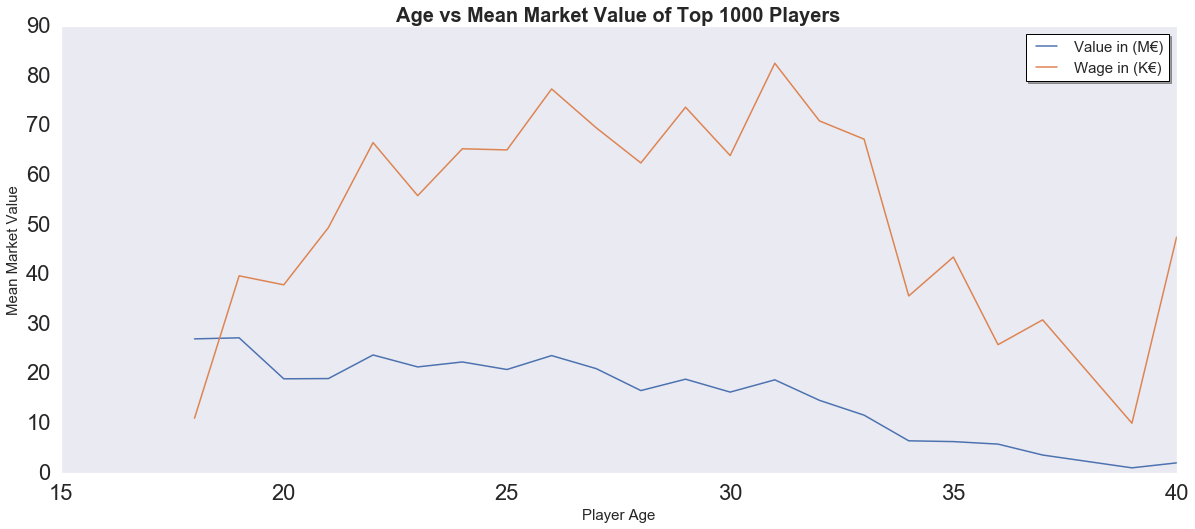

In [303]:
plt.figure()
plt.figure(figsize=(20,8))
plt.title('Age vs Mean Market Value of Top 1000 Players', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Mean Market Value', fontsize=15)
sns.set_style("dark")
plt.plot(top1000_age1, top1000_value, label="Value in (M€)")
plt.plot(top1000_age2, top1000_wage, label="Wage in (K€)")
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()